# Plotting Foreclosures

In this activity, you’ll use Plotly Express and the Mapbox API to visualize and explore real-estate data.

Instructions:

1. Access your Mapbox API credentials in your environment file (`.env`). Set these credentials as your Mapbox access token by using the `px.set_mapbox_access_token_function`.

    > **Hint** For this task, complete the following steps:
    > 1. Enter your Mapbox API access token into the provided `sample.env` file, and then change the file name to `.env`.
    > 2. Load the Mapbox API access token into the notebook from the environment file (`.env`).
    > 3. Create the Mapbox API access token variable.
    > 4. Set the Mapbox API access token by calling the `px.set_mapbox_access_token` function.

2. Using the `read_csv` function and the Path module, read "2018_Registered_Foreclosure_Properties.csv" from the `Resources` folder, and create the `la_foreclosures_2018` DataFrame.

3. Review the code that creates the `most_foreclosures_df` DataFrame from the `la_foreclosures_2018` DataFrame. The starter file provides this code. Be sure to run this cell as you work through the next steps.

    >**Important** The [Pandas `isin` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) was used to filter the `la_foreclosures_2018` DataFrame based on a Python list that includes the five lenders with the most foreclosures: Ocwen Loan Servicing, LLC; Wells Fargo Bank NA; JP Morgan Chase NA; and Nationstar Mortgage LLC.

4. Use the `scatter_mapbox` function to plot the data from the `most_foreclosures_df` DataFrame. Include parameters as follows:

    * Set `lat` and `lon` based on the “Latitude” and “Longitude” columns in the DataFrame.

    * Set `color` based on the “Lender” column.

    * Set `zoom` to 8.

    * Create a `title` for the plot.

5. Use the `scatter_mapbox` function to create a second plot from the `most_foreclosures_df` DataFrame. Keep all the parameters unchanged except as follows:

    * Set the `color` parameter to “Property Type”.

    * Change the `title` parameter to correspond to the new information that you’re plotting.

6. Use the `scatter_mapbox` function to create a third plot from the `most_foreclosures_df` DataFrame. Keep all the parameters unchanged except as follows:

    * Set the `color` parameter to “Council District”.

    * Change the `title` parameter to correspond to the new information that you’re plotting.

7. Answer the following questions in the notebook:

    * After reviewing the visualizations, what insights can you gain about the foreclosures in Los Angeles in 2018?

    * Which lender owns the most foreclosed properties?

    * Do the lenders tend to focus on one area or council district in the city, or do they evenly distribute their properties throughout the region?


References:

[Plotly Express and Mapbox API Integration](https://plotly.com/python/scattermapbox/)

[Pandas `isin` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) 

In [1]:
#Import the the required libraries and dependencies
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

## Step 1:  Access your Mapbox API credentials in your environment file (`.env`). Set these credentials as your Mapbox access token by using the `px.set_mapbox_access_token_function`.

In [2]:
# Load the Mapbox API access token from the .env file
load_dotenv()


True

In [3]:
# Create the Mapbox API access token variable
map_box_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that Mapbox API access token is available by checking the type
type(map_box_api_access_token)


str

In [4]:
# Set the Mapbox API access token to the users API key
px.set_mapbox_access_token(map_box_api_access_token)


## Step 2:Using the `read_csv` function and the Path module, read "2018_Registered_Foreclosure_Properties.csv" from the `Resources` folder, and create the `la_foreclosures_2018` DataFrame.

In [5]:
# Using the read_csv file and Path module, read in the 
# "2018_Registered_Foreclosure_Properties.csv" file and create the DataFrame
la_foreclosures_2018 = pd.read_csv(
    Path("../Resources/2018_Registered_Foreclosure_Properties.csv")
)


# Review the first and last five rows of the DataFrame
display(la_foreclosures_2018.head())
display(la_foreclosures_2018.tail())


APN Registered Date  Property Type     Property Address  \
0  6003016019      10/31/2018   Multi-Family       1217 W 60TH PL   
1  2151015040      11/01/2018  Single Family  20519 W HATTERAS ST   
2  5442030015      11/05/2018  Single Family      2801 N MARSH ST   
3  5015020012      01/17/2018   Multi-Family       2071 W 52ND ST   
4  7416002028      01/05/2018  Single Family    649 N FRIGATE AVE   

  Property City Property State  Property Zip  Council District  \
0   LOS ANGELES             CA       90044.0                 9   
1   LOS ANGELES             CA       91367.0                 3   
2   LOS ANGELES             CA       90039.0                13   
3   LOS ANGELES             CA       90062.0                 8   
4   LOS ANGELES             CA       90744.0                15   

                                  Lender Lender Contact Lender Contact Phone  \
0                   JCAP Financial Group  Donna Cornejo         714-278-4202   
1  Digestive Disease Research Foundation   Neil Gitnick         818-921-2455   
2         Allstar Financial Services Inc     sumana sur         818-346-7827   
3                     JP Morgan Chase NA       Amy Lott         888-310-1506   
4                 BSI Financial Services    Ken Bodamer         800-327-7861   

    Property Management Property Management Contact  \
0                   NaN                         NaN   
1                   NaN                         NaN   
2                   NaN                         NaN   
3  Safeguard Properties        Safeguard Properties   
4                   NaN                         NaN   

                      Property Management Address  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3  3540   WILSHIRE BLVD 1109 LOS ANGELES CA 90010   
4                                             NaN   

  Property Management Contact Phone  \
0                               NaN   
1                               NaN   
2                               NaN   
3                      800-852-8306   
4                               NaN   

                                     Property on Map   Latitude   Longitude  
0  1217 W 60TH PL\nLOS ANGELES, CA 90044\n(33.985...  33.985025 -118.296540  
1  20519 W HATTERAS ST\nLOS ANGELES, CA 91367\n(3...  34.175498 -118.579552  
2  2801 N MARSH ST\nLOS ANGELES, CA 90039\n(34.10...  34.104301 -118.248531  
3  2071 W 52ND ST\nLOS ANGELES, CA 90062\n(33.995...  33.995044 -118.316025  
4  649 N FRIGATE AVE\nLOS ANGELES, CA 90744\n(33....  33.777863 -118.278247

APN Registered Date  Property Type       Property Address  \
3107  6050013014      01/22/2018   Multi-Family  9517 1/2 S CLOVIS AVE   
3108  6048034019      01/31/2018   Multi-Family      9501 S BANDERA ST   
3109  5475021019      07/17/2018  Single Family       835 N ONEONTA DR   
3110  4019009001      01/12/2018  Single Family     5910 S EDGEMAR AVE   
3111  2135012015      03/21/2018  Single Family     7000 N OAKDALE AVE   

     Property City Property State  Property Zip  Council District  \
3107   LOS ANGELES             CA       90002.0                 8   
3108   LOS ANGELES             CA       90002.0                15   
3109   LOS ANGELES             CA       90065.0                 1   
3110   LOS ANGELES             CA       90043.0                 8   
3111   LOS ANGELES             CA       91306.0                 3   

                         Lender    Lender Contact Lender Contact Phone  \
3107      Wells Fargo Bank N.A.     Jenna Douglas         877-617-5274   
3108  Dovenmuehle Mortgage, Inc  Juanita Howarter         847-550-7300   
3109               CitiMortgage     Erin Theobald         877-290-3997   
3110      Wells Fargo Bank N.A.     Jenna Douglas         877-617-5274   
3111                 Cenlar FSB     ATHENA SANTOS         720-945-5431   

           Property Management Property Management Contact  \
3107                       LPS               Jenna Douglas   
3108      Safeguard Properties                Edward Zubia   
3109      Safeguard Properties                Edward Zubiz   
3110          Wells Fargo Bank               Tim McCluskey   
3111  Law Offices of Les Zieve               Dawn Talavera   

                         Property Management Address  \
3107       1003  E Brier DR  San Bernardino CA 92408   
3108  3540   WILSHIRE BLVD 1109 LOS ANGELES CA 90010   
3109      3540   wilshire BLVD  Los Angeles CA 90010   
3110        440  S LaSalle AVE 2000 Chicago IL 60605   
3111         30   Corporate PARK 450 IRVINE CA 92606   

     Property Management Contact Phone  \
3107                      281-404-7816   
3108                      213-804-7437   
3109                      213-383-2097   
3110                       800-617-495   
3111                      714-848-7920   

                                        Property on Map   Latitude   Longitude  
3107  9517 1/2 S CLOVIS AVE\nLOS ANGELES, CA 90002\n...  33.949653 -118.256471  
3108  9501 S BANDERA ST\nLOS ANGELES, CA 90002\n(33....  33.950373 -118.239651  
3109  835 N ONEONTA DR\nLOS ANGELES, CA 90065\n(34.1...  34.111352 -118.217526  
3110  5910 S EDGEMAR AVE\nLOS ANGELES, CA 90043\n(33...  33.986845 -118.350032  
3111  7000 N OAKDALE AVE\nLOS ANGELES, CA 91306\n(34...  34.197602 -118.566609

## Step 3: Review the code that creates the `most_foreclosures_df` DataFrame from the `la_foreclosures_2018` DataFrame. The starter file provides this code. Be sure to run this cell as you work through the next steps.

In [6]:
# A list of the lenders that are to be included in the analysis.
lenders = [
    "Ocwen Loan Servicing, LLC",
    "Wells Fargo Bank N.A.",
    "JP Morgan Chase NA",
    "Nationstar Mortgage LLC",
]

# Using the Python `isin` function, create a subset of the original DataFrame that includes
# only the "Lenders" that are in the "lenders" list.
most_foreclosures_df = la_foreclosures_2018[la_foreclosures_2018["Lender"].isin(lenders)]

# Review the first five rows of the resulting DataFrame
most_foreclosures_df.head()

APN Registered Date  Property Type     Property Address  \
3   5015020012      01/17/2018   Multi-Family       2071 W 52ND ST   
8   2524021020      01/04/2018  Single Family    13279 W VAUGHN ST   
24  2621005006      10/15/2018  Single Family    13640 W GARBER ST   
33  5451026007      01/03/2018  Single Family  3749 N GLENALBYN DR   
35  2316002030      01/04/2018  Single Family   11622 W KESWICK ST   

   Property City Property State  Property Zip  Council District  \
3    LOS ANGELES             CA       90062.0                 8   
8    LOS ANGELES             CA       91340.0                 7   
24   LOS ANGELES             CA       91331.0                 6   
33   LOS ANGELES             CA       90065.0                 1   
35   LOS ANGELES             CA       91605.0                 6   

                       Lender Lender Contact Lender Contact Phone  \
3          JP Morgan Chase NA       Amy Lott         888-310-1506   
8       Wells Fargo Bank N.A.  Jenna Douglas         877-617-5274   
24    Nationstar Mortgage LLC   Paula Acosta         972-315-8837   
33  Ocwen Loan Servicing, LLC    Judy Credit         800-746-2936   
35  Ocwen Loan Servicing, LLC    Judy Credit         800-746-2936   

                    Property Management Property Management Contact  \
3                  Safeguard Properties        Safeguard Properties   
8                                   LPS               Jenna Douglas   
24               Pinelands Preservation                 Aaron Noble   
33  Property Preservation Servicing LLC             Trevethan Aaron   
35  Property Preservation Servicing LLC             Trevethan Aaron   

                       Property Management Address  \
3   3540   WILSHIRE BLVD 1109 LOS ANGELES CA 90010   
8        1003  E Brier DR  San Bernardino CA 92408   
24       1906   Irvine AVE  Newport Beach CA 92660   
33             5   Columbia   ALISO VIEJO CA 92656   
35             5   Columbia   ALISO VIEJO CA 92656   

   Property Management Contact Phone  \
3                       800-852-8306   
8                       281-404-7816   
24                      949-294-8778   
33                      949-625-4480   
35                      949-625-4480   

                                      Property on Map   Latitude   Longitude  
3   2071 W 52ND ST\nLOS ANGELES, CA 90062\n(33.995...  33.995044 -118.316025  
8   13279 W VAUGHN ST\nLOS ANGELES, CA 91340\n(34....  34.281704 -118.422398  
24  13640 W GARBER ST\nLOS ANGELES, CA 91331\n(34....  34.248274 -118.430194  
33  3749 N GLENALBYN DR\nLOS ANGELES, CA 90065\n(3...  34.093187 -118.216053  
35  11622 W KESWICK ST\nLOS ANGELES, CA 91605\n(34...  34.210274 -118.385325

## Step 4: Use the `scatter_mapbox` function to plot the data from the `most_foreclosures_df` DataFrame. Include parameters as follows:

    * Set `lat` and `lon` based on the “Latitude” and “Longitude” columns in the DataFrame.
    * Set `color` based on the “Lender” column.
    * Set `zoom` to 8.
    * Create a `title` for the plot.


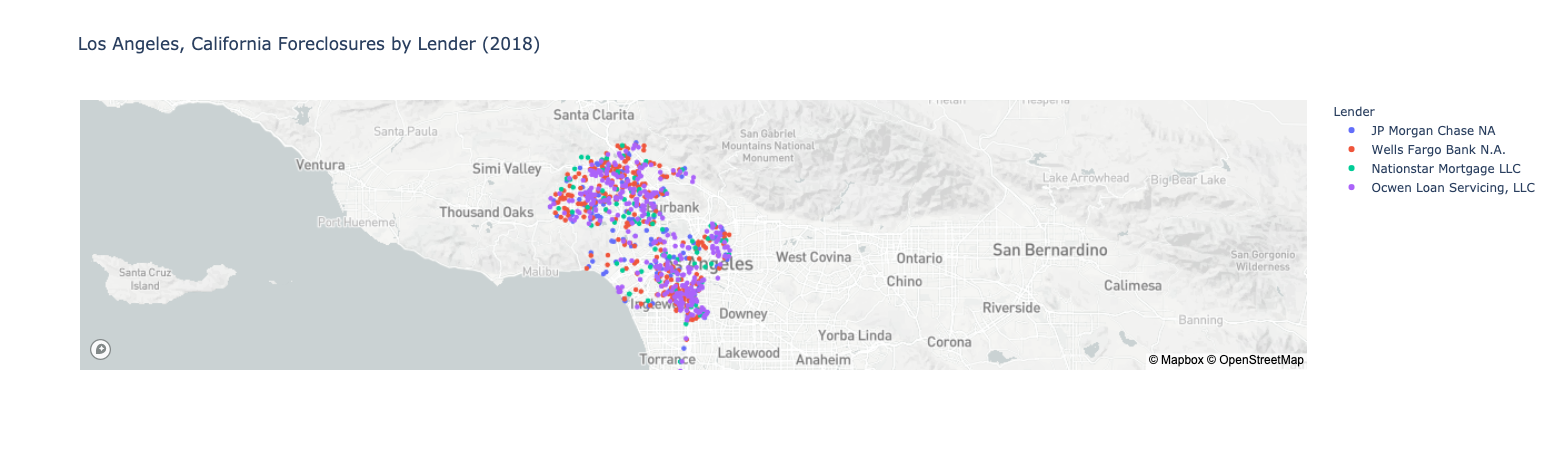

In [7]:
# Create the Mapbox Scatter plot based on the most_foreclosures_df DataFrame.
# The color parameter should be based on Lender
px.scatter_mapbox(
    most_foreclosures_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Lender",
    zoom = 8, 
    title = "Los Angeles, California Foreclosures by Lender (2018)",
)


## Step 5: Use the `scatter_mapbox` function to create a second plot from the `most_foreclosures_df` DataFrame. Keep all the parameters unchanged except as follows:

    * Set the `color` parameter to “Property Type”.
    * Change the `title` parameter to correspond to the new information that you’re plotting.



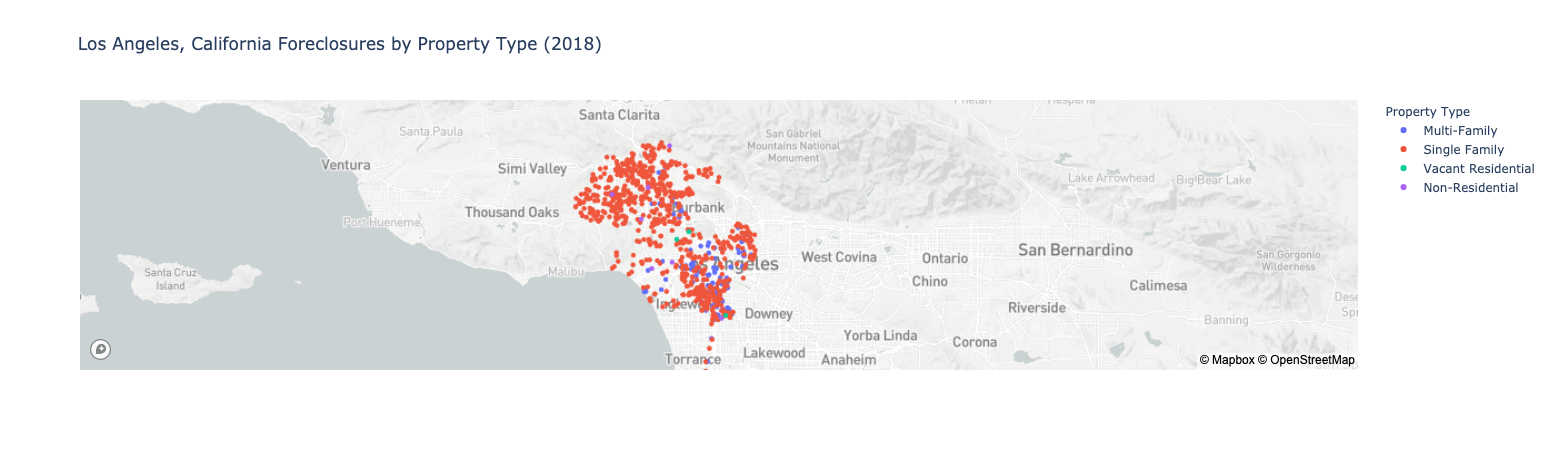

In [8]:
# Create the Mapbox Scatter plot based on the most_foreclosures_df DataFrame.
# The color parameter should be based on Property Type
px.scatter_mapbox(
    most_foreclosures_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Property Type",
    zoom = 8, 
    title = "Los Angeles, California Foreclosures by Property Type (2018)",
)


## Step 6: Use the `scatter_mapbox` function to create a third plot from the `most_foreclosures_df` DataFrame. Keep all the parameters unchanged except as follows:

    * Set the `color` parameter to “Council District”.
    * Change the `title` parameter to correspond to the new information that you’re plotting.


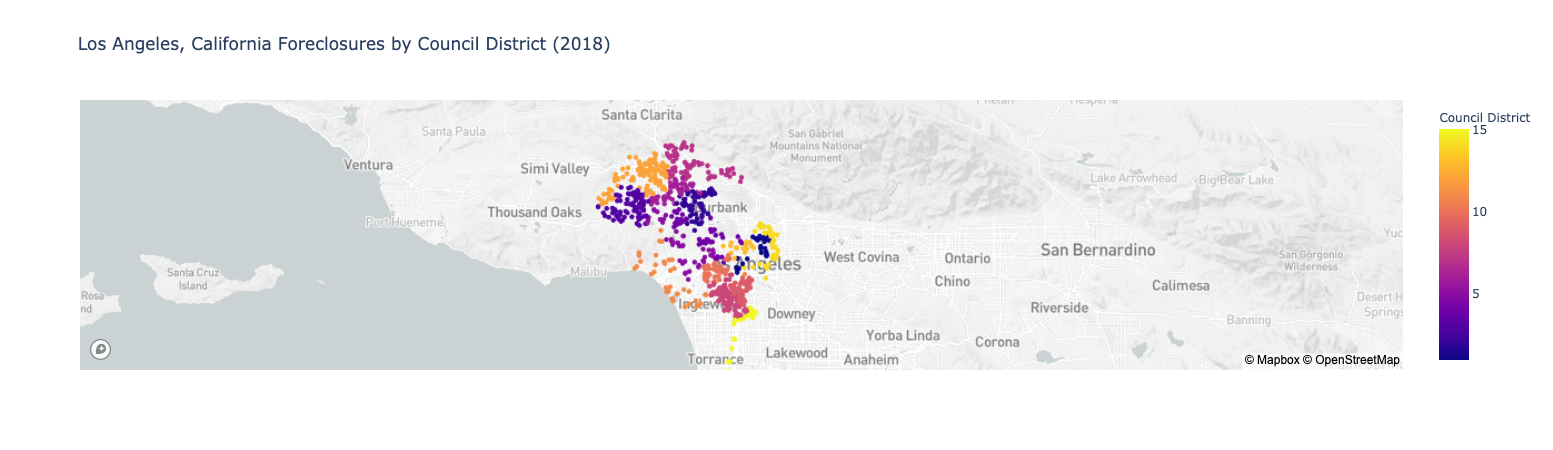

In [9]:
# Create the Mapbox Scatter plot based on the most_foreclosures_df DataFrame.
# The color parameter should be based on Council District
px.scatter_mapbox(
    most_foreclosures_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Council District",
    zoom = 8, 
    title = "Los Angeles, California Foreclosures by Council District (2018)",
)

## Step 7: Answer the following questions: 

**Questions** After reviewing the visualizations, what insights can you gain about the foreclosures in Los Angeles in 2018? Which lender owns the most foreclosed properties? Do the lenders tend to focus on one area or council district in the city or are their properties evenly distributed throughout the region?

**Answers** Reviewing the plots, Ocwen Loan Servicing LLC seems to be the biggest lender associated with foreclosed properties in the area. They are primarliy associated with Single Family dwellings with some Multi-Family included. Additionally, their dwelling are spread out around the region rather than being focused in any single council district. 

The most interesting properties are in council districts 11 & 15, located along the coast. These might be properties that could garner some interest.

Ocwen owns a lot of foreclosed homes in the area. If there was a new real estate firm looking to enter the LA foreclosure market, Ocwen might be willing to make a deal where they could sell some properties at below-market prices to get them off of their books. 